In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats
import pylab as pl
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



<ipython-input-1-f58f300fbb80>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Step1

In [41]:
df_wmt = pd.read_csv("WMT22.csv")

In [45]:
df_wmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Close   251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [43]:
df_wmt=df_wmt.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [46]:
avg_wmt = df_wmt['Close'].mean()

In [48]:
df_wmt['deviation'] = df_wmt['Close']-avg_wmt

In [51]:
df_wmt.head()

,Date,Close,deviation,deviation2
0,2022-01-03,144.649994,6.419835,41.214275
1,2022-01-04,142.000000,3.769841,14.211698
2,2022-01-05,143.919998,5.689839,32.374262
3,2022-01-06,143.520004,5.289845,27.982455
4,2022-01-07,144.889999,6.659840,44.353462


In [50]:
df_wmt['deviation2'] = np.square(df_wmt['deviation'])

In [52]:
sum_deviation2 = df_wmt['deviation2'].sum()

In [53]:
variance = (sum_deviation2/251)

In [54]:
daily_volatility = math.sqrt(variance)

In [55]:
print(daily_volatility)

9.947922732163654


In [56]:
annual_volatility = 15.84 * daily_volatility #Sqrt 251 is 15.84

In [57]:
print(annual_volatility)

157.5750960774723


In [58]:
df_wmt.head()

,Date,Close,deviation,deviation2
0,2022-01-03,144.649994,6.419835,41.214275
1,2022-01-04,142.000000,3.769841,14.211698
2,2022-01-05,143.919998,5.689839,32.374262
3,2022-01-06,143.520004,5.289845,27.982455
4,2022-01-07,144.889999,6.659840,44.353462


# Step2

In [4]:
df = pd.read_csv("WMT_12yr.csv")

In [64]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,54.230000,54.799999,54.150002,54.560001,41.036911,14298300
1,2011-01-04,54.610001,54.880001,54.279999,54.770000,41.194870,12154400
2,2011-01-05,54.750000,55.070000,54.320000,54.410000,40.924072,14215600
3,2011-01-06,54.310001,54.380001,53.779999,53.959999,40.585606,15585500
4,2011-01-07,53.889999,54.150002,53.759998,54.080002,40.675873,7968600


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3020 non-null   object 
 1   Open       3020 non-null   float64
 2   High       3020 non-null   float64
 3   Low        3020 non-null   float64
 4   Close      3020 non-null   float64
 5   Adj Close  3020 non-null   float64
 6   Volume     3020 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.3+ KB


In [5]:
df1 = df.copy()

In [67]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,54.230000,54.799999,54.150002,54.560001,41.036911,14298300
1,2011-01-04,54.610001,54.880001,54.279999,54.770000,41.194870,12154400
2,2011-01-05,54.750000,55.070000,54.320000,54.410000,40.924072,14215600
3,2011-01-06,54.310001,54.380001,53.779999,53.959999,40.585606,15585500
4,2011-01-07,53.889999,54.150002,53.759998,54.080002,40.675873,7968600


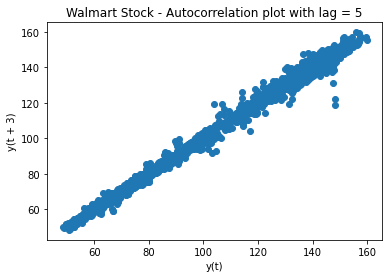

In [81]:
plt.figure()
lag_plot(df1['Close'], lag=3)
plt.title('Walmart Stock - Autocorrelation plot with lag = 5')
plt.show()

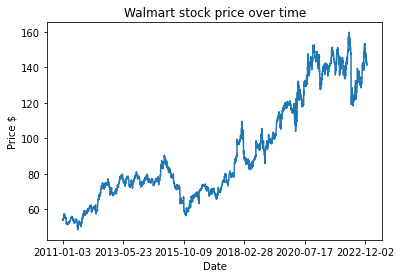

In [78]:
plt.plot(df1["Date"], df["Close"])
plt.xticks(np.arange(0,3020, 600), df['Date'][0:3020:600])
plt.title("Walmart stock price over time")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.show()

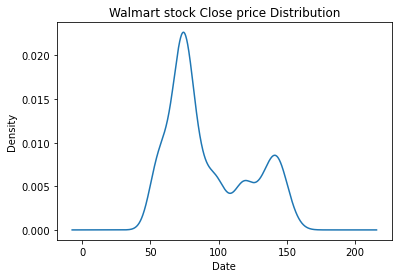

In [7]:
df_close = df1['Close']
df_close.plot(kind='kde')
plt.title("Walmart stock Close price Distribution")
plt.xlabel("Date")
plt.ylabel("Density")
plt.show()

### Model 1

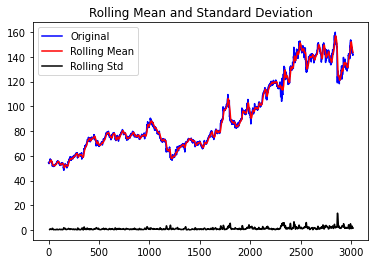

Results of dickey fuller test
Test Statistics                  -0.715624
p-value                           0.842661
No. of lags used                 22.000000
Number of observations used    2997.000000
critical value (1%)              -3.432534
critical value (5%)              -2.862505
critical value (10%)             -2.567284
dtype: float64


In [10]:


#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

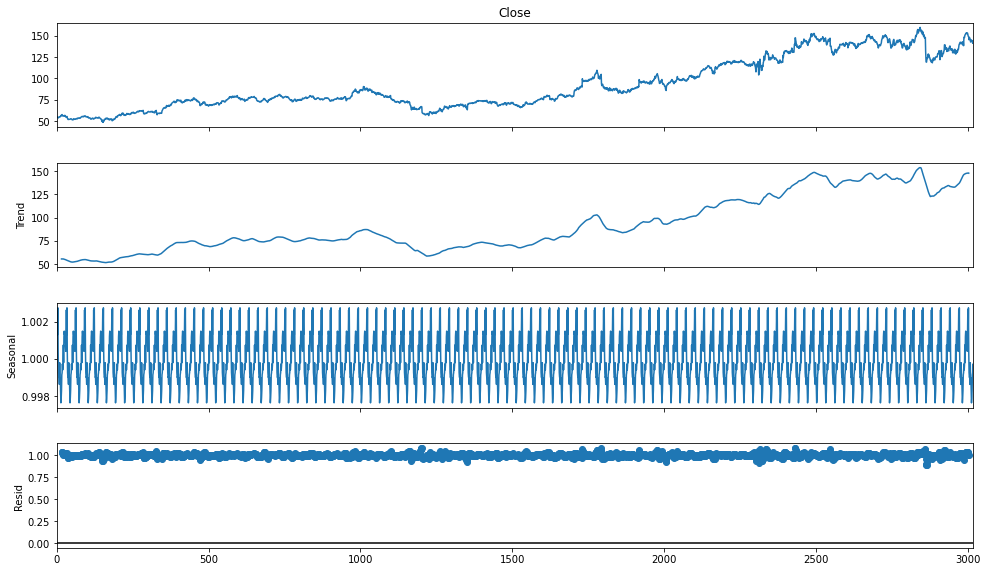

In [13]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


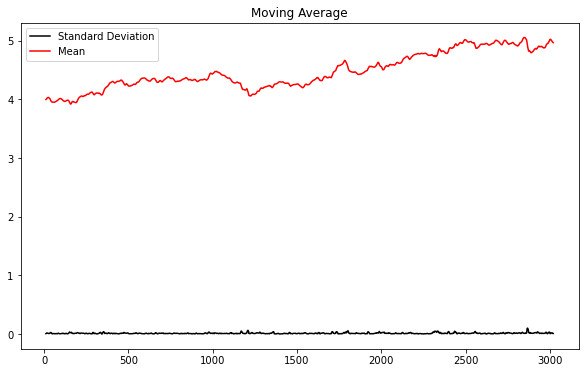

In [14]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

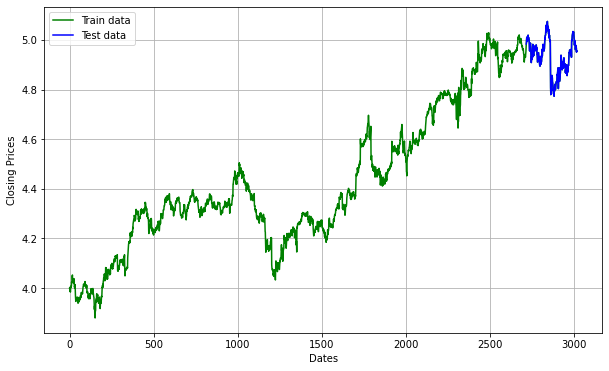

In [15]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16254.763, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16276.525, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16276.106, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16254.317, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-16274.603, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16274.606, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-16274.182, Time=1.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16275.589, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.117 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2715
Model:               SARIMAX(1, 1, 0)   Log Likelihood                8141.262
Date:                Wed, 08 Nov 2023   AIC                         -16276.525
Time:               

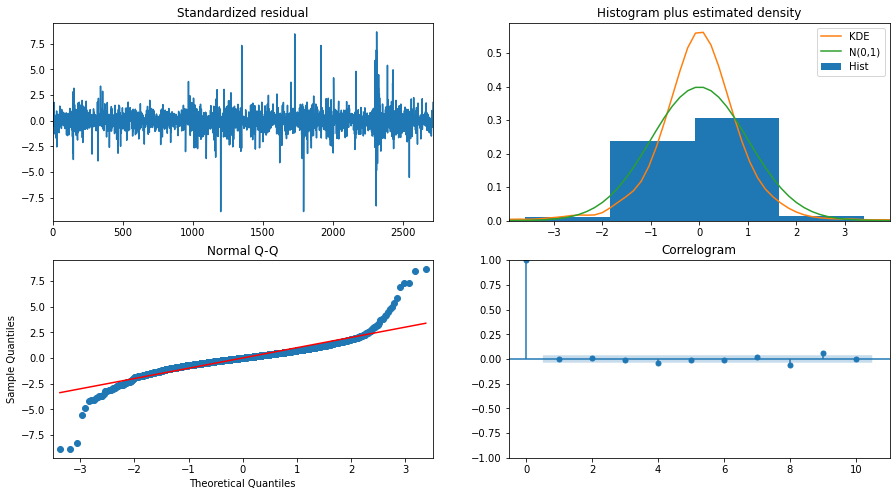

In [16]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [22]:

from statsmodels.tsa.arima.model import ARIMA
#Build Model
model = ARIMA(train_data, order=(1,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2715
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8139.795
Date:                Wed, 08 Nov 2023   AIC                         -16275.589
Time:                        13:06:43   BIC                         -16263.777
Sample:                             0   HQIC                        -16271.319
                               - 2715                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0925      0.009    -10.139      0.000      -0.110      -0.075
sigma2         0.0001   1.41e-06    102.997      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

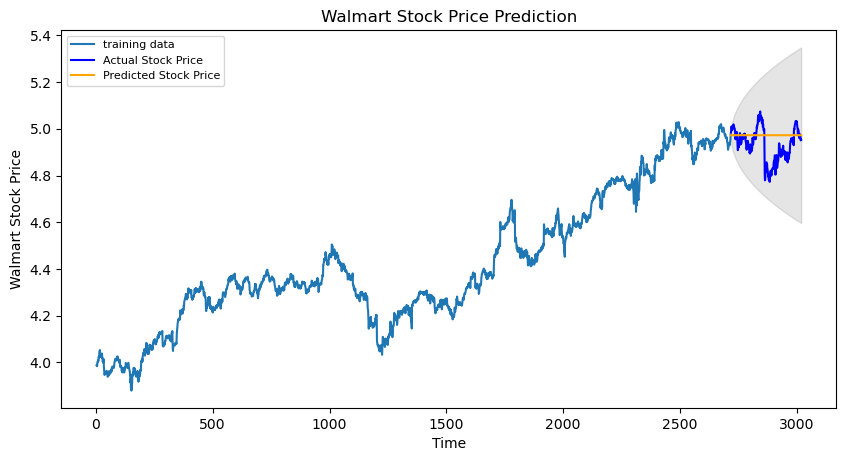

In [32]:
# Forecast
forecast_result = fitted.get_forecast(steps=321, alpha=0.05)  # 95% conf
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)



# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Walmart Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Walmart Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

ValueError: Found input variables with inconsistent numbers of samples: [302, 321]

In [25]:
forecast_result = fitted.forecast(steps=321, alpha=0.05)

In [26]:
print(forecast_result)

2718    4.972650
2719    4.972829
2720    4.972813
2721    4.972814
2722    4.972814
          ...   
3034    4.972814
3035    4.972814
3036    4.972814
3037    4.972814
3038    4.972814
Name: predicted_mean, Length: 321, dtype: float64


### Model 2

In [84]:
import warnings

In [83]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/Users/aarya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 3.8979346165040756


KeyError: 'key of type tuple not found and not a MultiIndex'

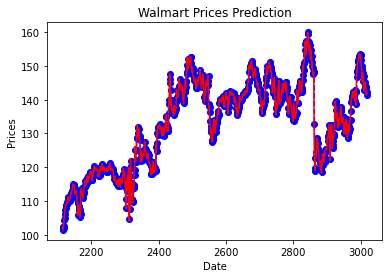

In [88]:
test_set_range = df1[int(len(df1)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Walmart Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df1.Date[881,1259,50])
plt.legend()
plt.show()